# Background subtraction for spatial maps in focus beam and slit beam

In [1]:
%run -i ../tomography/utils.py

In [2]:
%run -i startup3.py

## Extract the peak positions

In [4]:
grains = db_cdf.get_data("60d4dad53652b26d789f32df")
grains["maps"].attrs["standard_name"] = "focus beam"

In [8]:
grains["maps"] -= grains["maps"].min(dim=["dim_0", "dim_1"])

In [5]:
grains2 = db_cdf.get_data("60ca20090ea9000d07b715ff")
grains2["maps"].attrs["standard_name"] = "slit beam"

In [9]:
grains2["maps"] -= grains2["maps"].min(dim=["dim_0", "dim_1"])

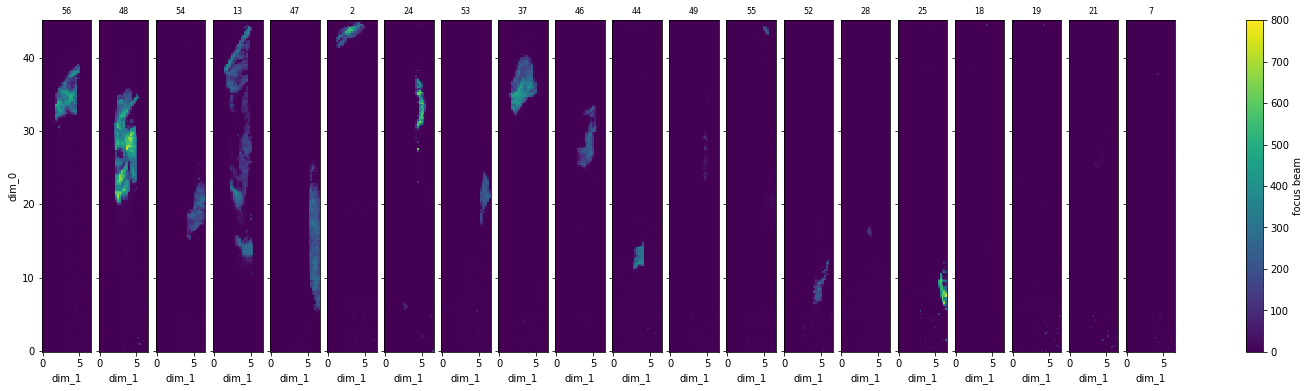

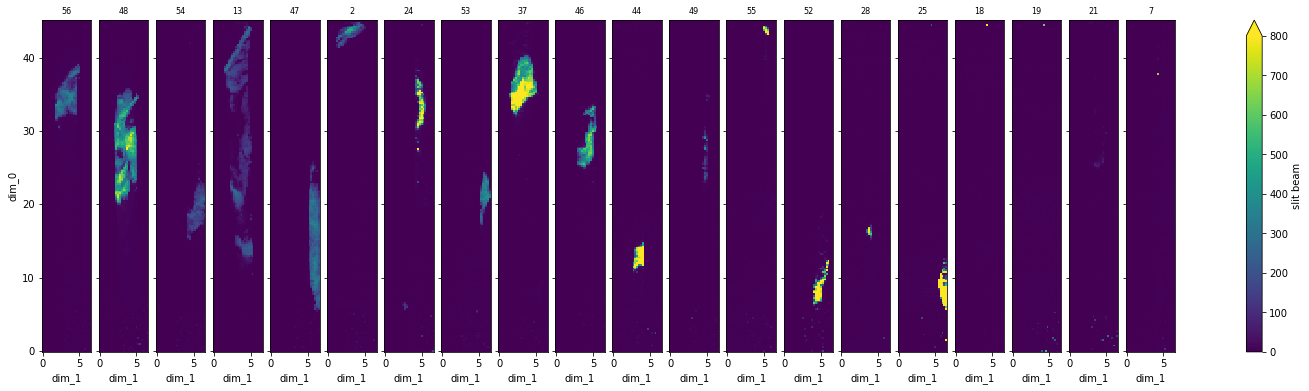

In [14]:
facet = plot_grain_maps(grains, vmax=800)
facet.set_titles(template="{value}", size=8)
facet = plot_grain_maps(grains2, vmax=800)
facet.set_titles(template="{value}", size=8)
del facet

In [15]:
avg = grains["maps"].mean(dim=["dim_0", "dim_1"])
avg2 = grains2["maps"].mean(dim=["dim_0", "dim_1"])

In [21]:
df = pd.DataFrame(
    {"focus beam": avg.to_series(), "slit beam": avg2.to_series()}
)

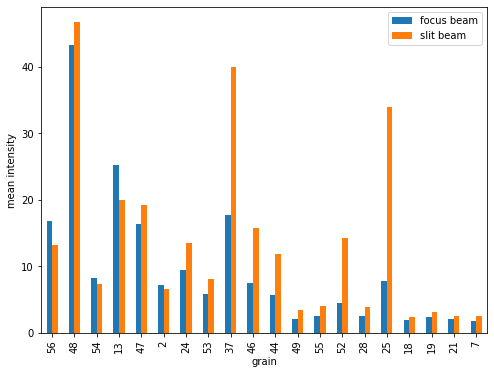

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
df.plot.bar(ylabel="mean intensity", ax=ax)
plt.show()